# Visulalize Dataset containing missing values

Dataset: Titanic - Machine Learning from Disaster
- https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv
- https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


df_raw = sns.load_dataset('titanic')


def print_value_counts(dataframe, column_name: str) -> None:
    """Print information how many values are in each column."""
    print(
        f'{column_name} value counts:\n{dataframe[column_name].value_counts()}\n'
    )


def dataframe_dropped_columns(columns_to_pop, dataframe):
    """Return datafame droppped columns recursively.
    """
    column = columns_to_pop.pop()
    dataframe_current = dataframe.drop(column, axis=1)

    if len(columns_to_pop) < 1:
        return dataframe_current
    else:
        return dataframe_dropped_columns(columns_to_pop, dataframe_current)


In [2]:
"""Prepare dataset."""
print(type(df_raw))

<class 'pandas.core.frame.DataFrame'>


In [3]:
display(df_raw)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# Investigate missing values.
print(df_raw.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Find out how many values are in each.
print_value_counts(df_raw, 'embark_town')
print_value_counts(df_raw, 'alive')

embark_town value counts:
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive value counts:
no     549
yes    342
Name: alive, dtype: int64



In [6]:
# Print the survey of statistical information.
display(df_raw.describe())

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Print age averages by gender.
display(df_raw.groupby('sex').mean())

/tmp/ipykernel_2553/204729965.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df_raw.groupby('sex').mean())


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


<Figure size 1200x1200 with 0 Axes>

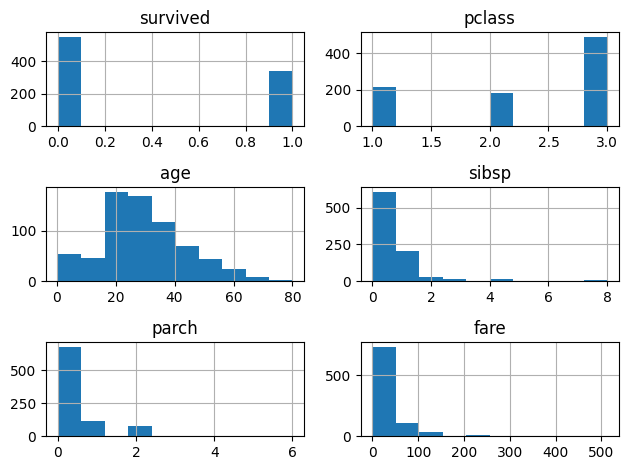

In [8]:
# Display a histogram of the items to be analyzed.
columns_for_analyze = [
    'survived',
    'pclass',
    'age',
    'sibsp',
    'parch',
    'fare'
]

plt.figure(figsize=(12, 12))
df_raw[columns_for_analyze].hist()
plt.tight_layout()
plt.show()

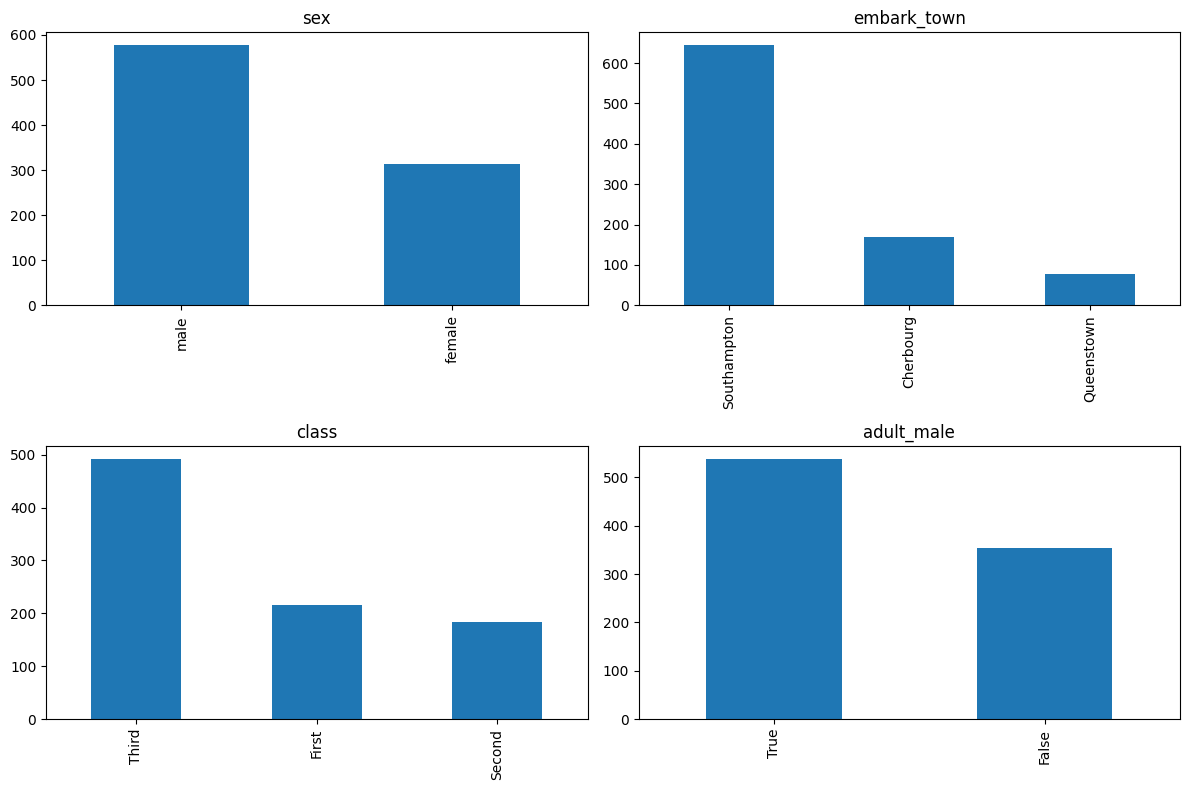

In [9]:
# Display NON-numeric items graphically.
non_numeric_items = [
    'sex',
    'embark_town',
    'class',
    'adult_male'
]

plt.figure(figsize=(12, 8))

for index, name in enumerate(non_numeric_items):
    ax = plt.subplot(2, 2, index + 1)
    df_raw[name].value_counts().plot(
        kind='bar',
        title=name,
        ax=ax
    )

plt.tight_layout()
plt.show()

In [10]:
"""Data preprocessing."""
# Eliminate duplicate columns of dataframe.
df = dataframe_dropped_columns(
    arr_for_pop := non_numeric_items.copy(),
    df_raw
)

display(df.head())

,survived,pclass,age,sibsp,parch,fare,embarked,who,deck,alive,alone
0,0,3,22.0,1,0,7.2500,S,man,NaN,no,False
1,1,1,38.0,1,0,71.2833,C,woman,C,yes,False
2,1,3,26.0,0,0,7.9250,S,woman,NaN,yes,True
3,1,1,35.0,1,0,53.1000,S,woman,C,yes,False
4,0,3,35.0,0,0,8.0500,S,man,NaN,no,True


In [11]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
alive         0
alone         0
dtype: int64

In [12]:
# Check 'deck' column item types that have values.
print_value_counts(df, 'deck')

deck value counts:
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64



Therefore, the following policy will be used to address missing values.
- embarked
  - Since there are only two missing rows, delete the entire row.
- age
  - 177 lines, which is quite a lot.
  - Numerical data.
  - So, fill in NaN by substituting the __median__ of the data.
- deck
  - 688 lines, which is a very large number.
  - Fill NaN with dummy code __`N`__, meaning missing, to make all lines eligible for processing.

In [13]:
# Dealing with missing values in 'embarked'.
df = df.dropna(subset=['embarked'])

display(df.isnull().sum())
display(df.head())

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
deck        688
alive         0
alone         0
dtype: int64

,survived,pclass,age,sibsp,parch,fare,embarked,who,deck,alive,alone
0,0,3,22.0,1,0,7.2500,S,man,NaN,no,False
1,1,1,38.0,1,0,71.2833,C,woman,C,yes,False
2,1,3,26.0,0,0,7.9250,S,woman,NaN,yes,True
3,1,1,35.0,1,0,53.1000,S,woman,C,yes,False
4,0,3,35.0,0,0,8.0500,S,man,NaN,no,True


In [14]:
# Dealing with missing values in 'age'.
age_median = df['age'].median()
df = df.fillna(
    {'age': age_median}
)

display(df.isnull().sum())

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
deck        688
alive         0
alone         0
dtype: int64

In [15]:
# Dealing with missing values in 'deck'.
df['deck'] = df['deck'].astype(np.str_)

df = df.fillna(
    {'deck': 'N'}
)

display(df.isnull().sum())
display(df.head())

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
deck        0
alive       0
alone       0
dtype: int64

,survived,pclass,age,sibsp,parch,fare,embarked,who,deck,alive,alone
0,0,3,22.0,1,0,7.2500,S,man,nan,no,False
1,1,1,38.0,1,0,71.2833,C,woman,C,yes,False
2,1,3,26.0,0,0,7.9250,S,woman,nan,yes,True
3,1,1,35.0,1,0,53.1000,S,woman,C,yes,False
4,0,3,35.0,0,0,8.0500,S,man,nan,no,True
